In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 10, 4)

The data of bank stock details are extracted from "Yahoo" search engine. 

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

# State Bank of India
SBI = data.DataReader("SBI",'yahoo',start,end)

In [6]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC','SBI'],'yahoo', start, end)

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC','SBI']

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC,SBI],axis=1,keys=tickers)

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [10]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2018-12-31   24.969999  24.370001  24.570000  24.639999  56257300.0   
2019-01-02   25.139999  24.010000  24.080000  24.959999  71836300.0   
2019-01-03   25.040001  24.450001  24.940001  24.559999  66599600.0   
2019-01-04   25.650000  25.030001  25.100000  25.580000  83829100.0   
2019-01-07   25.780001  25.290001  25.559999  25.559999  57016300.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2018-12-31   23.346699  52.669998  51.389999  51.980000  52.060001  ...   
2019-01-02   23.649902  53.740002  50.669998  50.680000  53.529999  ...   
2019-01-03   23.270899  53.619999  52.220001  53.410000  52.560001  ...   
2019-01-04   24.237360  55.380001  53.660000  54.009998  55.130001  ...   
2019-01-07   24.218410  56.209999  54.799999  55.330002  55.610001  ...   

Bank Ticker        WFC                                     SBI              \
Stock Info        Open      Close      Volume  Adj Close  High   Low  Open   
Date                                                                         
2018-12-31   45.980000  46.080002  16544500.0  42.454750  8.42  8.26  8.27   
2019-01-02   45.529999  46.939999  20295200.0  43.247082  8.49  8.33  8.33   
2019-01-03   46.650002  46.570000  22262000.0  42.906197  8.52  8.44  8.44   
2019-01-04   47.419998  47.950001  23343600.0  44.177628  8.52  8.40  8.50   
2019-01-07   47.779999  47.639999  21858000.0  43.892014  8.54  8.47  8.53   

Bank Ticker                            
Stock Info  Close    Volume Adj Close  
Date                                   
2018-12-31   8.35  181800.0  7.726212  
2019-01-02   8.48   14900.0  7.846500  
2019-01-03   8.49   32900.0  7.855757  
2019-01-04   8.48   45500.0  7.846500  
2019-01-07   8.49   38500.0  7.855757  

[5 rows x 42 columns]

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     40.049999
C       81.910004
GS     348.809998
JPM    157.649994
MS      84.339996
WFC     54.459999
SBI      9.630000
dtype: float64

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,SBI Return
Date,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.012987,0.028237,0.029811,0.017312,0.018916,0.018663,0.015569
2019-01-03,-0.016026,-0.018121,-0.014649,-0.022153,-0.017822,-0.007882,0.001179
2019-01-04,0.041531,0.048896,0.032682,0.036865,0.040827,0.029633,-0.001178
2019-01-07,-0.000782,0.008707,0.005541,0.000695,0.009927,-0.006465,0.001179


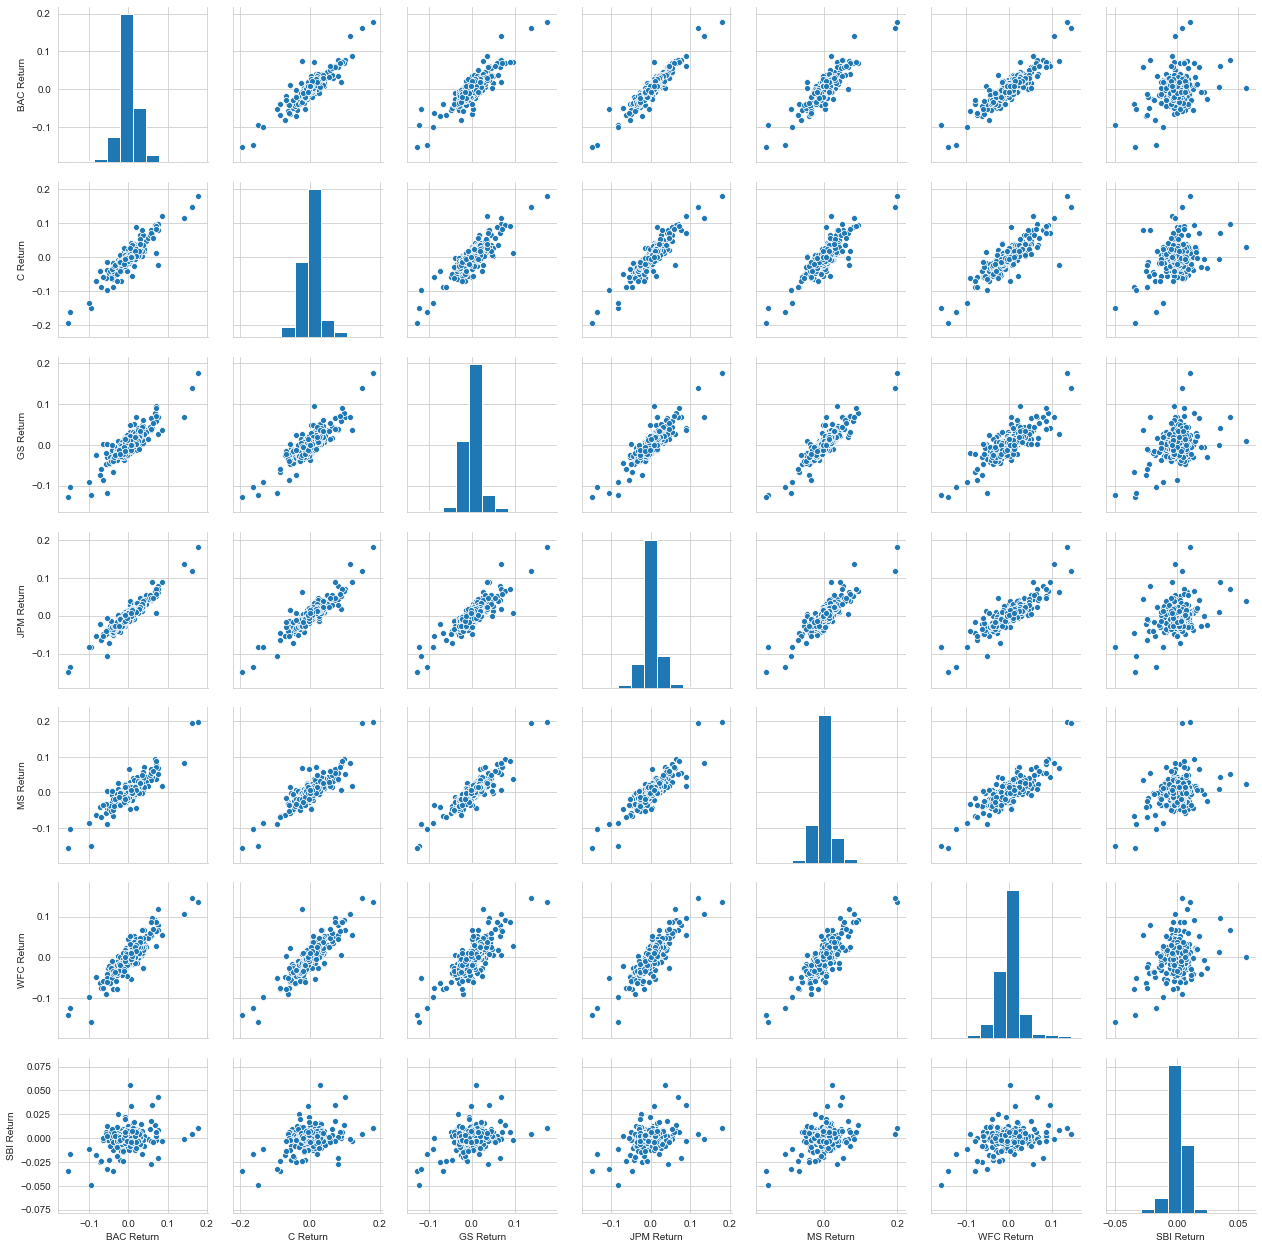

In [23]:
import seaborn as sns
sns.pairplot(returns[1:])

In [15]:
# Heighest Drop
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
SBI Return   2020-03-12
dtype: datetime64[ns]

In [16]:
# Heighest Gain
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
SBI Return   2020-03-25
dtype: datetime64[ns]

In [17]:
# Riskiest Bank
returns.std()

BAC Return    0.027123
C Return      0.030879
GS Return     0.024713
JPM Return    0.024642
MS Return     0.026628
WFC Return    0.028231
SBI Return    0.007607
dtype: float64

F:\Anaconda for Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



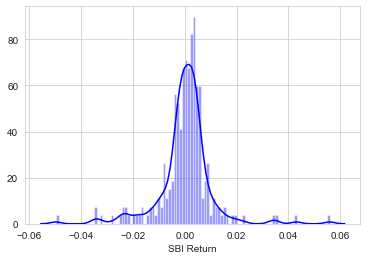

In [18]:
sns.distplot(returns.ix['2020-01-01':'2020-12-31']['SBI Return'],color='blue',bins=100)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

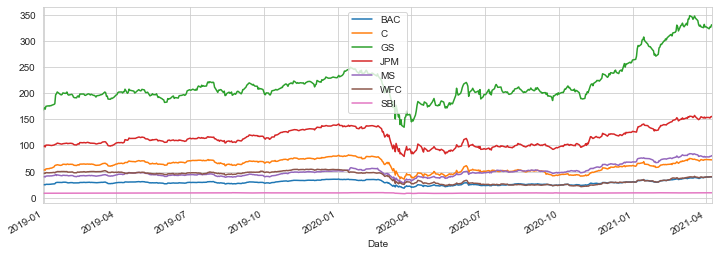

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

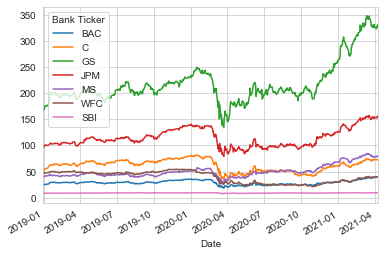

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

F:\Anaconda for Python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

F:\Anaconda for Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



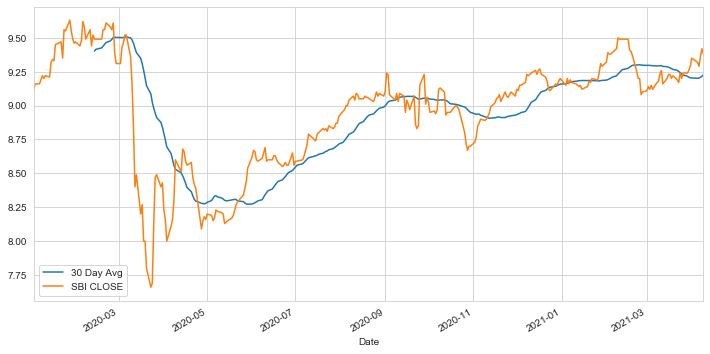

In [35]:
plt.figure(figsize=(12,6))
SBI['Close'].ix['2020-01-01':'2021-10-04'].rolling(window=30).mean().plot(label='30 Day Avg')
SBI['Close'].ix['2020-01-01':'2021-10-04'].plot(label='SBI CLOSE')
plt.legend()

In [32]:
# Simple moving averages plot
SBI['Close'].ix['2019-01-01':'2021-09-04'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages of SBI')

F:\Anaconda for Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [34]:
# Bollinger Band Plot 
SBI['Close'].ix['2020-01-01':'2021-09-04'].ta_plot(study='boll')

F:\Anaconda for Python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

